In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [163]:
file_name = './Data/Gamma data/Eficiencia/2,00.mca'

In [164]:
Nch = 8192

ch, rate, srate = get_rates(file_name)
rate_bkg, srate_bkg = get_bkg()


147


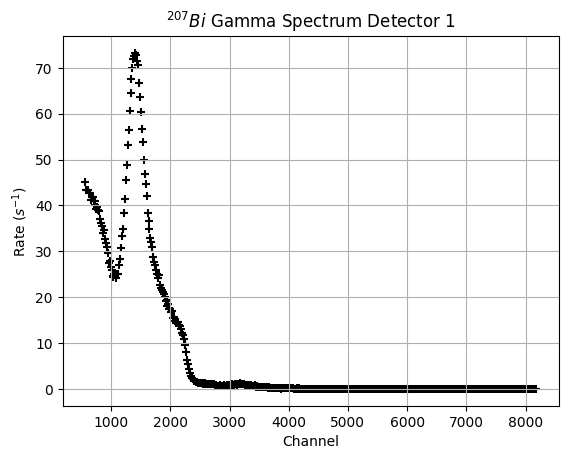

In [165]:
real_rate = rate - rate_bkg
sreal_rate = np.sqrt(srate**2+srate_bkg**2)
limInf = 35

plt.scatter(ch[limInf:], real_rate[limInf:],marker='+',c="black")
plt.title('$^{207} Bi$ Gamma Spectrum Detector 1')
plt.xlabel('Channel')
plt.ylabel('Rate ($s^{-1}$)')
plt.grid()
# plt.savefig('./Plots/Espectros/152Eu_D2.png')
plt.show()



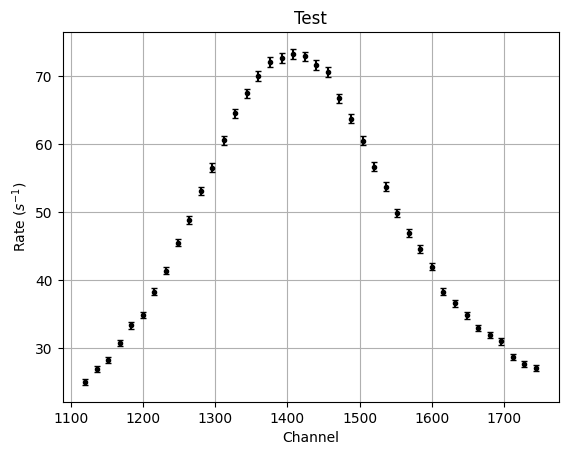

In [180]:
limMax = 110
limMin = 70


x = ch[limMin:limMax]
y = real_rate[limMin:limMax]
sy = sreal_rate[limMin:limMax]

plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black")
plt.title('Test')
plt.xlabel('Channel')
plt.ylabel('Rate ($s^{-1}$)')
plt.grid()

plt.show()

In [181]:
def func(x,*p):
    return (p[0] + p[1]*x + p[2]*x**2 + p[3]*np.exp(-(1/2)*((x-p[4])/p[5])**2))
    

In [182]:
res_param, res_xi2, res_cov = fit(x,y,sy,func,[0,0,0,70,1400,10])

In [183]:
print(res_param)
print(res_xi2)

[-1.89613640e+02  3.09207867e-01 -1.06238589e-04  3.83226319e+01
  1.40364277e+03 -1.11200386e+02]
0.5125273107956831


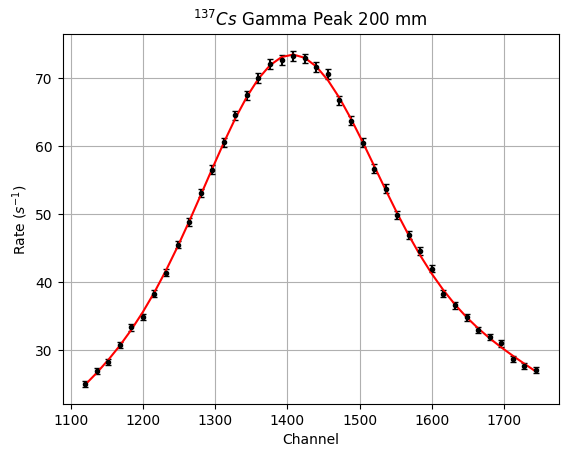

In [184]:
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Rate ($s^{-1}$)')
plt.title('$^{137} Cs$ Gamma Peak 200 mm')
plt.scatter(x, y, yerr=sy,capsize=2,fmt='.',c="black",label='Data')
plt.plot(x, func(x,*res_param), 'r-', label='Fit')
# plt.savefig('./Plots/Eficiencias/200mm.png')
plt.show()

In [185]:
N = 3*2

In [186]:
for i in range(N):
    print('p'+str(i)+' = '+str(res_param[i]))
    # print(str(res_param[i]))

p0 = -189.61364004611062
p1 = 0.3092078671063588
p2 = -0.00010623858943677541
p3 = 38.322631915667756
p4 = 1403.642774116595
p5 = -111.20038648242203


In [187]:
for i in range(N):
    print('s(p'+str(i)+') = '+str(np.sqrt(res_cov[i,i])))
    # print(str(np.sqrt(res_cov[i,i])))

s(p0) = 20.721169270044896
s(p1) = 0.030846318513034706
s(p2) = 1.0909667637812092e-05
s(p3) = 1.0425640395089915
s(p4) = 0.6909685716106392
s(p5) = 2.065191566020466


In [188]:
print(res_xi2)

0.5125273107956831
